<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=30>
<p></p><p></p>
به نام خدا
<p></p>
</font>
<p></p>

<font color=blue>
<br>
    پروژه
آمار و احتمال مهندسی 
<br>
مدرس: دکتر مطهری
</font>
<p></p>

<p></p>
<font color=#FF7500>
پاییز 1400
<br>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
</font>
<br>
<br>
</div>
</font>
</div>
<br>

<br>

<p style = 'color:blue;' align=center>
    جواب ها با رنگ ابی نوشته شده اند
</p>

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=5>
<font color=red size=7>
<p></p>
<div align=center> بخش اول : تولید متغیرهای تصادفی</div>
</font>
<hr>    
در این بخش، تنها با استفاده از تابع ()np.random.random که یک متغیر تصادفی uniform(0,1) می‌دهد، بایستی سایر متغیرهای تصادفی معروف را تولید کنید. برای هر کدام از این متغیرهای تصادفی، یک تابع بنویسید که پارامترهای لازم را گرفته و یک متغیر تصادفی از آن توزیع را خروجی دهد. سپس برای بررسی صحت کارکرد توابع، یک آرایه از این متغیر تصادفی ها ایجاد کرده و هیستوگرام آن‌ها را رسم کنید.
<br>
روش تولید هر یک از متغیرها را به صورت دقیق توضیح دهید. واضح است که می‌توانید از توابعی که خودتان نوشته‌اید در کنار ()np.random.random استفاده کنید (مثلاً استفاده از bernoulli در binomial)

</font></div>

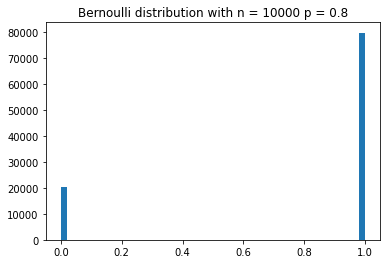

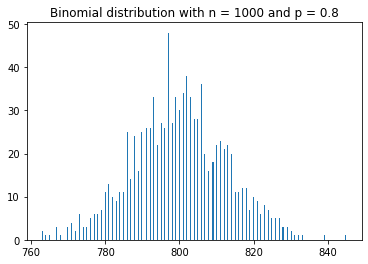

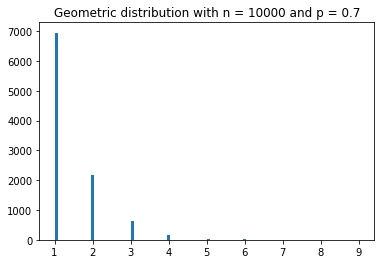

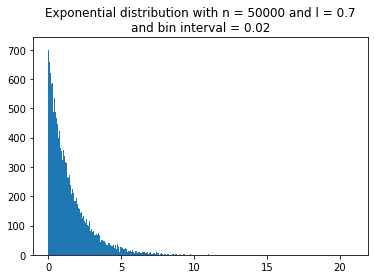

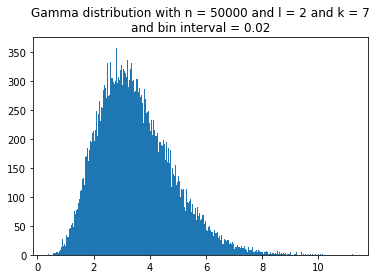

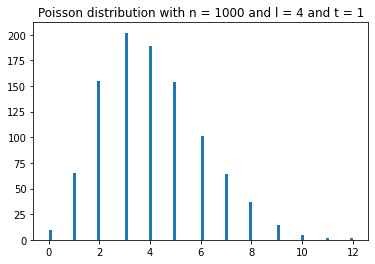

In [69]:
#PS pragramming assignment of 'Mahdi shafiee' student ID = 99109409.

import numpy as np
from matplotlib import pyplot as plt


def bernoulli(p):
    """
    returns a bernoulli random variable with probability p
    first we define x which is a variable uniformly distributed between 0 and 1. we should return 1 with probablity p
    and 0 with probablity 1 - p. and probablity of x < p is p. so we return 1 if x < p.
    """
    x = np.random.random()
    if x < p:
        return 1
    else:
        return 0


def binomial(n, p):
    """
    returns a binomial random variable with probability p and number of trials of n
    p(k) = B(n, p, k) which k is number of successes in bernoulli distribution. so we run n bernoulli
    experiment and return number of successes which is equal to sum.
    """
    sum = 0
    for i in range(n):
        sum = sum + bernoulli(p)
    return sum


def geometric(p):
    """
    returns a geometric random variable with probability p
    CDF of geometric distribution is equal to F(k) = 1 - (1 - p) ^ k. so if we randomly (uniformly) choose x
    between 0 and 1, probability of k <= x < k + 1 is equal to to f(k) = (1 - p) ^ (k - 1) p.
    so x = ceil(log(1 - x) / np.log(1 - p)).
    """
    x = np.random.random()
    return np.ceil(np.log(1 - x) / np.log(1 - p))


def exponential(l):
    """
    returns an exponential random variable with parameter lambda.
    f(k) = l exp(-lk). so if x is a uniformly distributed random variable between 0 and 1, then probability of k
    being between f(k) which k is F(x)^-1. so k = -(log(1 - x) / log(np.e)) / l.
    """
    x = np.random.random()
    return -(np.log(1 - x) / np.log(np.e)) / l


def gamma(l, k):
    """
    returns a gamma random variable with parameters lambda and k  (hint : you can use exponential(lambda) function to
    create gamma)
    if we have n exponential(l) random variables, sum(xi) creates a gamma random variable with k = n and l = l
    """
    sum = 0
    for i in range(round(k)):
        sum = sum + exponential(l)
    return sum


def poisson(l, t):
    """
    returns a poisson random variable with parameter lambda*t (hint: you can use exponential(lambda) function to
    create poisson).
    we know that if lim n->inf Bin(n, p) = Po(np). so we set n = 500 * l * t and p = 1 / 500.
    """
    return binomial(round(l * t * 500), 1 / 500)


n = 100000
array = [0.0] * n
for i in range(n):
    array[i] = bernoulli(0.8)
plt.hist(array, 50)
plt.title("Bernoulli distribution with n = 10000 p = 0.8")
plt.show()

n = 1000
array = [0] * n
for i in range(n):
    array[i] = binomial(n, 0.8)
plt.hist(array, 300)
plt.title("Binomial distribution with n = 1000 and p = 0.8")
plt.show()

n = 10000
array = [0.0] * n
for i in range(n):
    array[i] = geometric(0.7)
plt.hist(array, 100)
plt.title("Geometric distribution with n = 10000 and p = 0.7")
plt.show()

n = 50000
array = [0.0] * n
for i in range(n):
    array[i] = exponential(0.7)
plt.hist(array, round(max(array) - min(array)) * 50)
plt.title("Exponential distribution with n = 50000 and l = 0.7\nand bin interval = 0.02")
plt.show()

array = [0.0] * n
for i in range(n):
    array[i] = gamma(2, 7)
plt.hist(array, round(max(array) - min(array)) * 50)
plt.title("Gamma distribution with n = 50000 and l = 2 and k = 7\nand bin interval = 0.02")
plt.show()

n = 1000
array = [0] * n
for i in range(n):
    array[i] = poisson(4, 1)
plt.hist(array, 100)
plt.title("Poisson distribution with n = 1000 and l = 4 and t = 1")
plt.show()


<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=5>
<font color=red size=7>
<p></p>
<div align=center> بخش دوم : بررسی داده‌های کشتی تایتانیک</div>
</font>
<hr>
در این بخش داده‌های مربوط به کشتی تایتانیک را خوانده و بررسی خواهید کرد. پس از اینکه داده‌ها را خواندید، با استفاده از 
تابع head می‌توانید اطلاعاتی که هر ستون نشان می‌دهد را بررسی کنید. همانطور که از داده‌های پیداست، تعدادی از سطرها، اطلاعاتشان ناقص است و NaN در آنها قرار گرفته است. روش‌های متنوعی برای مواجه با این مشکل وجود دارد. برای پر کردن اطلاعات ستون Age، می‌خواهیم از میانگین سن داده‌هایی که شبیه هستند، استفاده کنیم.
<br>
برای اینکار، بایستی یک ستون جدید به دیتافریم اضافه کنید که نمایانگر عنوان افراد می‌باشد. این عنوان، از اسم افراد برداشته می‌شود. به طور مثال، عنوان Mr. Owen Harris برابر Mr می‌باشد. 
<br>
پس از اضافه کردن این ستون، سن افرادی که سن آنها NaN می‌باشد را برابر میانگین سن افراد آن عنوان قرار می‌دهیم.

</font></div>

In [66]:
import pandas as pd


def add_title_column(df):
    df["abbreviation"] = ""
    for i in range(891):
        string = df.loc[i, 'Name']
        split1 = string.split(", ")
        split2 = split1[1].split(".")
        df.loc[i, 'abbreviation'] = split2[0]
    df.to_csv("titanic.csv", index=False)
    return df


def fix_age_nan(df):
    titles = ["Capt", "Col", "Don", "Dr", "Jonkheer", "Lady", "Major", "Master", "Miss", "Mlle", "Mme", "Mr", "Mrs", "Ms", "Rev", "Sir", "the Countess"]
    num = [0] * 17
    age = [0.0] * 17
    for i in range(891):
        if not pd.isnull(df.loc[i, 'Age']):
            string = df.loc[i, 'abbreviation']
            index = titles.index(string)
            num[index] = num[index] + 1
            age[index] = age[index] + df.loc[i, 'Age']
    for i in range(891):
        if pd.isnull(df.loc[i, 'Age']):
            string = df.loc[i, 'abbreviation']
            index = titles.index(string)
            df.loc[i, 'Age'] = age[index] / num[index]
    df.to_csv("titanic.csv", index=False)
    return df


df = pd.read_csv("titanic.csv")
add_title_column(df)
fix_age_nan(df)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,abbreviation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Mr


<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=5>
<ol>
    <li>
با استفاده از ویژگی title که در بخش قبل اضافه کردید، نمودار میله‌ای افراد زنده مانده و نمانده با هر یک از عنوان ها را رسم کنید.
    </li>
    <li>
هیستوگرام  age را 
رسم کنید و توزیع جمعیت مسافران را مشاهده نمایید (براي سن از بازه هاي مناسب استفاده نمایید.) یک بار نیز این کار را براي دو دسته ي زنده
ماده و نمانده انجام ندهید. حال این نمودارها را با جداسازي جنسیت بکشید تا چهار نمودار داشته باشید. مشاهدات خود را ثبت کنید.
</li>
    <li>
نمودار Heatmap یک نمایش گرافیکی دو بعدي از دادگان است که ارتباط ویژگی هاي مختلف را نشان می دهد. علاوه بر ارتباط بین  هرویژگی با
زنده ماندن، بین خود ویژگی ها نیز ممکن است ارتباط معناداري باشد. براي دریافتن این ارتباطات میتوان همبستگی یا  Correlation بین ستون
ها را مقایسه کرد. میتوان براي مقایسه جامع از  Heatmap استفاده کرد و همبستگی بین ستون ها را نشان داد. Correlation Heat map
ویژگی ها و همچنین  survival را رسم نمایید. کدام ویژگی ها داراي همبستگی زیادي هستند؟ 

</li>
    <li>
     نمودار جعبه اي مقدار  Fare را براي 
  3 گروه  Pclass و براي دو حالت   Survived  0,1 (یعنی در مجموع   6 نمودار) رسم کنید. چه نتیجه اي در رابطه با پراکندگی داده‌ها میتوان گرفت؟

</div>


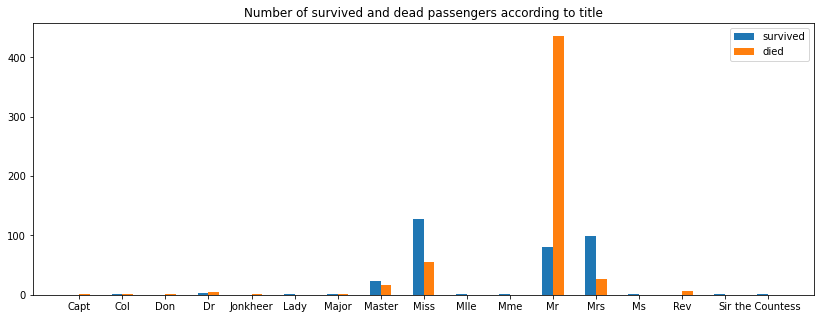

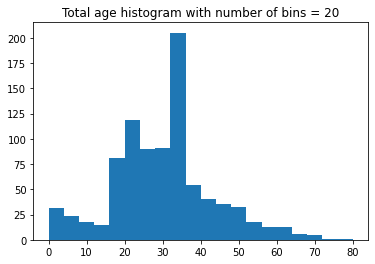

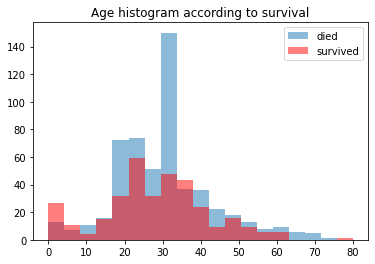

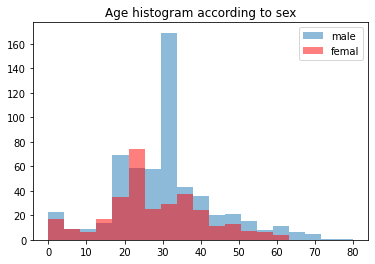

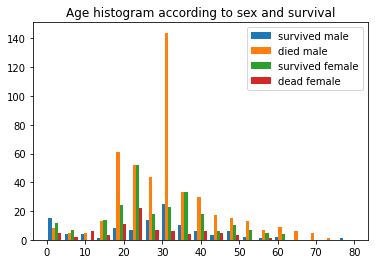

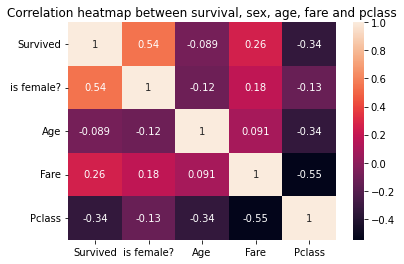

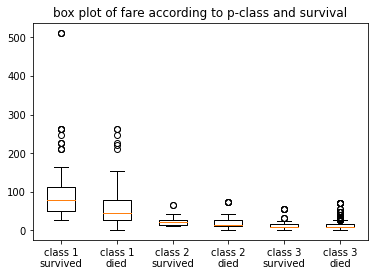

conclusion from box plot: there is a meaningful difference between fare of different p-classes, which suggests that passengers with more fair, stayed in higher classes. But moreover, fare of survivors in class 1 is considerably higher than class 1 passengers who died, which means that passengers with higher fares where more likely to survive.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

df = pd.read_csv("titanic.csv")
titles = ["Capt", "Col", "Don", "Dr", "Jonkheer", "Lady", "Major", "Master", "Miss", "Mlle", "Mme", "Mr", "Mrs", "Ms",
          "Rev", "Sir", "the Countess"]
survived = [0] * 17
dead = [0] * 17
age = [0.0] * 892
aliveAge = [0.0] * 0
deadAge = [0.0] * 0
maleAge = [0.0] * 0
femaleAge = [0.0] * 0
maleAliveAge = [0.0] * 0
maleDeadAge = [0.0] * 0
femaleAliveAge = [0.0] * 0
femaleDeadAge = [0.0] * 0
for i in range(891):
    string = df.loc[i, 'abbreviation']
    index = titles.index(string)
    age[i] = df.loc[i, 'Age']
    if df.loc[i, 'Sex'] == 'male':
        maleAge.append(df.loc[i, 'Age'])
        if df.loc[i, 'Survived'] == 1:
            maleAliveAge.append(df.loc[i, 'Age'])
        else:
            maleDeadAge.append(df.loc[i, 'Age'])
    else:
        femaleAge.append(df.loc[i, 'Age'])
        if df.loc[i, 'Survived'] == 1:
            femaleAliveAge.append(df.loc[i, 'Age'])
        else:
            femaleDeadAge.append(df.loc[i, 'Age'])
    if df.loc[i, 'Survived'] == 1:
        survived[index] = survived[index] + 1
        aliveAge.append(df.loc[i, 'Age'])
    else:
        dead[index] = dead[index] + 1
        deadAge.append(df.loc[i, 'Age'])
barWidth = 0.25
plt.figure(figsize=(14, 5))
br1 = np.arange(len(survived))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
plt.bar(br1, survived, width=barWidth, label='survived')
plt.bar(br2, dead, width=barWidth, label='died')
plt.xticks([r + barWidth / 2 for r in range(len(survived))], titles)
plt.legend()
plt.title("Number of survived and dead passengers according to title")
plt.show()
plt.hist(age, 20)
plt.title("Total age histogram with number of bins = 20")
plt.show()
bins = np.linspace(0, 80, 20)
plt.hist(deadAge, bins, alpha=0.5, label='died')
plt.hist(aliveAge, bins, alpha=0.5, label='survived', color='r')
plt.legend()
plt.title("Age histogram according to survival")
plt.show()
plt.hist(maleAge, bins, alpha=0.5, label='male')
plt.hist(femaleAge, bins, alpha=0.5, label='femal', color='r')
plt.legend()
plt.title("Age histogram according to sex")
plt.show()
plt.hist([maleAliveAge, maleDeadAge, femaleAliveAge, femaleDeadAge], bins, label=['survived male', 'died male', 'survived female', 'dead female'])
plt.legend()
plt.title("Age histogram according to sex and survival")
plt.show()
sex = [0] * 891
for i in range(891):
    if df.loc[i, 'Sex'] == 'male':
        sex[i] = 0
    else:
        sex[i] = 1
df["is female?"] = sex
frame = pd.DataFrame(df, columns=['Survived', 'is female?', 'Age', 'Fare', 'Pclass'])
corrMatrix = frame.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title("Correlation heatmap between survival, sex, age, fare and pclass")
plt.show()
fareClass1Survived = [0.0] * 0
fareClass1died = [0.0] * 0
fareClass2Survived = [0.0] * 0
fareClass2died = [0.0] * 0
fareClass3Survived = [0.0] * 0
fareClass3died = [0.0] * 0
for i in range(891):
    if df.loc[i, 'Pclass'] == 1:
        if df.loc[i, 'Survived'] == 1:
            fareClass1Survived.append(df.loc[i, 'Fare'])
        else:
            fareClass1died.append(df.loc[i, 'Fare'])
    if df.loc[i, 'Pclass'] == 2:
        if df.loc[i, 'Survived'] == 1:
            fareClass2Survived.append(df.loc[i, 'Fare'])
        else:
            fareClass2died.append(df.loc[i, 'Fare'])
    if df.loc[i, 'Pclass'] == 3:
        if df.loc[i, 'Survived'] == 1:
            fareClass3Survived.append(df.loc[i, 'Fare'])
        else:
            fareClass3died.append(df.loc[i, 'Fare'])
plt.boxplot([fareClass1Survived, fareClass1died, fareClass2Survived, fareClass2died, fareClass3Survived, fareClass3died],
            labels=['class 1\nsurvived', 'class 1\ndied', 'class 2\nsurvived', 'class 2\ndied', 'class 3\nsurvived', 'class 3\ndied'])

plt.title("box plot of fare according to p-class and survival")
plt.show()
print("conclusion from box plot: there is a meaningful difference between fare of different p-classes,"
      " which suggests that passengers with more fair, stayed in higher classes. But moreover, fare of"
      " survivors in class 1 is considerably higher than class 1 passengers who died, which means that passengers with higher fares where more likely to survive.")



<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=5>
<font color=red size=7>
<p></p>
<div align=center> بخش سوم : آزمون فرض</div>
</font>
<hr>
در این بخش با استفاده از t-test ، به بررسی این مسئله می‌پردازیم که که توزیع سن زنان و مردان یکی است یا نه. برای این منظور، دو زیرمجموعه‌ی 100 عضوی از آقایان و خانم‌ها از داده‌ی تاینانیک به صورت رندوم جدا کنید. فرض صفر ما این است که توزیع این دو زیرمجموعه، تفاوت معناداری ندارد. برای بررسی صحت این فرض، ابتدا t-value را حساب کنید. سپس با استفاده از جدول t و یا با استفاده از ()scipy.stats.t.cdf مقدار p-value را محاسبه و گزارش کنید. همچنین توضیح دهید که این مقدار p-value، چه حرفی در رابطه با فرض صفر ما می‌زند.

</font></div>

In [64]:
import statistics
import math
import pandas as pd
import numpy as np
import scipy
from scipy.stats import t
from matplotlib import pyplot as plt
import seaborn as sn


def get_male_subset(df, n=100):
    """
    return a randomly selected subset of n males
    subset should be a dataframe
    """
    subset = [0.0] * 0

    ####
    for i in range(n):
        index = round(np.random.random() * 890)
        while df.loc[index, 'Sex'] != 'male':
            index = round(np.random.random() * 890)
        subset.append(df.loc[index, 'Age'])
    ####
    return subset


def get_female_subset(df, n=100):
    """
    return a randomly selected subset of n females
    subset should be a dataframe
    """
    subset = [0.0] * 0
    ####
    for i in range(n):
        index = round(np.random.random() * 890)
        while df.loc[index, 'Sex'] != 'female':
            index = round(np.random.random() * 890)
        subset.append(df.loc[index, 'Age'])
    ####
    return subset


# Your code here
df = pd.read_csv("titanic.csv")
male_subset = get_male_subset(df, 100)
female_subset = get_female_subset(df, 100)
average_male = statistics.mean(male_subset)
average_female = statistics.mean(female_subset)
s = statistics.stdev(male_subset)
t_value = (average_male - average_female) / s * math.sqrt(100)
p_value = 2 * (1 - t.cdf(abs(t_value), 100))
print('p_value:')
print(p_value)
if p_value < 0.05:
    print("p_value is less than 0.05. so we can be confident that age distribution in male an female isn't equal.")
else:
    print("p_value is more than 0.05. so we can't be confident to reject the null hypothesis.")


p_value:
0.001291255447029016
p_value is less than 0.05. so we can be confident that age distribution in male an female isn't equal.


<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=5>
<font color=red size=7>
<p></p>
<div align=center> بخش چهارم : پیاده سازی Naive bayes (امتیازی)</div>
</font>
<hr>
در این بخش باید به وسیله برخی از ستون ها بتوانید ستون Survived را پیش بینی کنید.
 <hr>
 برای این منظور باید naive bayes classifier را پیاده سازی کنید که نحوه پیاده سازی آن را میتوانید از لینک زیر مطالعه کنید.
<a href="url">https://inblog.in/Categorical-Naive-Bayes-Classifier-implementation-in-Python-dAVqLWkf7E</a>
</font></div>

In [1]:
from math import sqrt
from math import pi
from math import exp
import pandas as pd
import statistics


def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if class_value not in separated:
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated


def summarize_dataset(dataset):
    summaries = [(statistics.mean(column), statistics.stdev(column), len(column)) for column in zip(*dataset)]
    del (summaries[-1])
    return summaries


def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries


def calculate_probability(x, mean, stdev):
    exponent = exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent


def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2] / float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities


df = pd.read_csv("titanic.csv")
frame = pd.DataFrame(df, columns=['Parch', 'SibSp', 'Pclass', 'Sex', 'Embarked', 'Survived'])
dataset = frame.to_numpy()
for i in range(891):
    if dataset[i][4] == 'C':
        dataset[i][4] = 1
    elif dataset[i][4] == 'S':
        dataset[i][4] = 2
    else:
        dataset[i][4] = 3
    if dataset[i][3] == 'male':
        dataset[i][3] = 1
    else:
        dataset[i][3] = 0
summaries = summarize_by_class(dataset)
accuracy = 0
print("predictions for the first 30 passengers:")
print("passengerID   prediction   reality")
for i in range(891):
    probabilities = calculate_class_probabilities(summaries, dataset[i])
    if probabilities[0] > probabilities[1]:
        prediction = 0
    else:
        prediction = 1
    if prediction == dataset[i][5]:
        accuracy = accuracy + 1
    if i <= 30:
        print(i, end="             ")
        print(prediction, end="            ")
        print(dataset[i][5])
print()
print("Prediction accuracy:", end="  ")
print(accuracy / 891)


predictions for the first 30 passengers:
passengerID   prediction   reality
0             0            0
1             1            1
2             1            1
3             1            1
4             0            0
5             0            0
6             0            0
7             0            0
8             1            1
9             1            1
10             1            1
11             1            1
12             0            0
13             0            0
14             1            0
15             1            1
16             0            0
17             0            1
18             1            0
19             1            1
20             0            0
21             0            1
22             1            1
23             0            1
24             0            0
25             1            1
26             0            0
27             0            0
28             1            1
29             0            0
30             1            0

Pre